# Seoul Bike Sharing Demand

This project uses a [data set](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand) from the UCI repository containing information on the number of rented bikes in Seoul by hour from 01/12/2017 to 30/11/2018. A lot of weather information was also collected fro each hour of this period.

The aim of the project is to develop a regression model to predict the number of rented bikes in Seoul based on weather and date information.

According to the UCI repository:
> Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

The owners of the data set have some published articles with their findings. An open article with their results can be found [here](https://www.tandfonline.com/doi/full/10.1080/22797254.2020.1725789).

## Data set attributes

* Date - dd/mm/yyyy
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of he day
* Temperature(degC) - Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - Yes or No

Size of data set: 8760 entries.

# EDA

In [1]:
# Basic imports for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting seaborn style
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,6)})

In [3]:
# Read data-set
df = pd.read_csv("SeoulBikeData.csv")

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(degC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(degC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         8760 non-null   object 
 1   Rented Bike Count            8760 non-null   int64  
 2   Hour                         8760 non-null   int64  
 3   Temperature(degC)            8760 non-null   float64
 4   Humidity(%)                  8760 non-null   int64  
 5   Wind speed (m/s)             8760 non-null   float64
 6   Visibility (10m)             8760 non-null   int64  
 7   Dew point temperature(degC)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)      8760 non-null   float64
 9   Rainfall(mm)                 8760 non-null   float64
 10  Snowfall (cm)                8760 non-null   float64
 11  Seasons                      8760 non-null   object 
 12  Holiday                      8760 non-null   object 
 13  Functioning Day   

There are no missing values in our dataframe.

## Handling date information

We can convert the `Date` column to datetime object and extract the month and day of the week to get more informative features (we can expect that some week days have more rented bikes than others, for example).

In [6]:
# Convert Date column to datetime object
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

In [7]:
df['Date']

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [8]:
# Extracting day of the week (dow) and month info
df['dow'] = df['Date'].dt.day_name()
df['month'] = df['Date'].dt.month_name()

We can create a `weekend` column to explore how weekends affect rented bike counts.

In [9]:
# Let's create a weekend column
def is_weekend(d):
    if d == 'Saturday' or d == 'Sunday':
        return 1
    else:
        return 0

df['weekend'] = df['dow'].apply(is_weekend)

In [10]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(degC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(degC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,dow,month,weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,0


The `Holiday` column is filled with strings. This can be put into a binary form using 0 for **No Holiday** and 1 for **Holiday**.

In [13]:
# Dealing with the 'Holiday' column - transforming data to 0 (No Holiday) or 1 (Holiday)
df['Holiday'] = df['Holiday'].apply(lambda H: 0 if H == 'No Holiday' else 1)

We can do the same for the `Functioning Day` column:

In [11]:
# Doing the same for the 'Functioning Day' column
df['Functioning Day'] = df['Functioning Day'].apply(lambda F: 1 if F == 'Yes' else 0)

In [12]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(degC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(degC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,dow,month,weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,January,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,January,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,January,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,January,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,January,0


## In the next few cells, I'll reproduce some figures from the [article](https://www.tandfonline.com/doi/full/10.1080/22797254.2020.1725789) of the dataset owners.

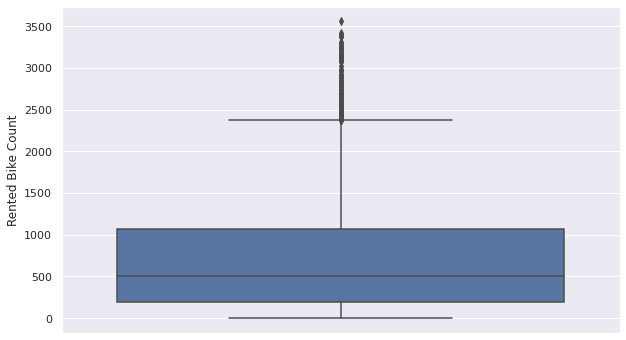

In [13]:
sns.boxplot(y='Rented Bike Count', data = df);

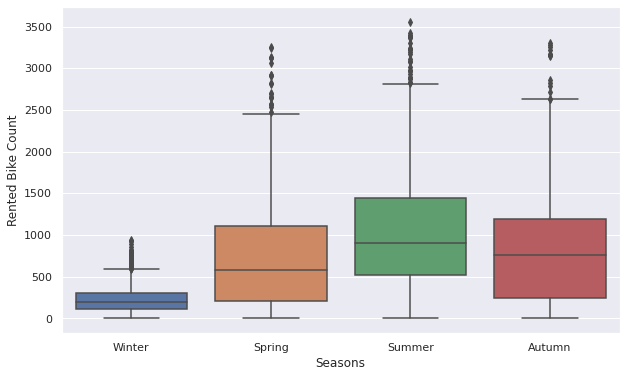

In [14]:
sns.boxplot(x='Seasons', y = 'Rented Bike Count', data = df);

Summer is the season with highest number of rented bikes and winter is the season with the lowest. Spring and autumn have similar distributions.

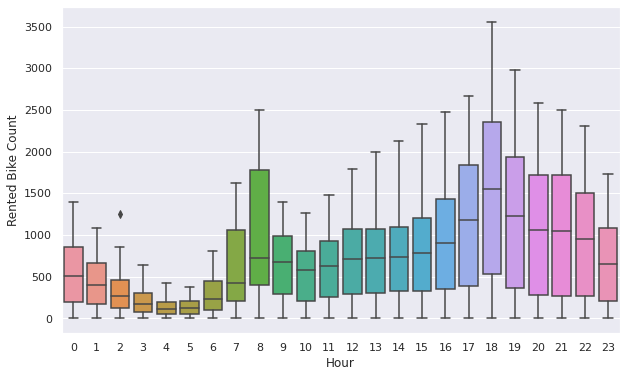

In [15]:
sns.boxplot(x='Hour', y = 'Rented Bike Count', data = df);

We can notice two picks here around 8h and 18h which may indicate that people use bikes to get to work in the morning and to go back home by the end of the working day.

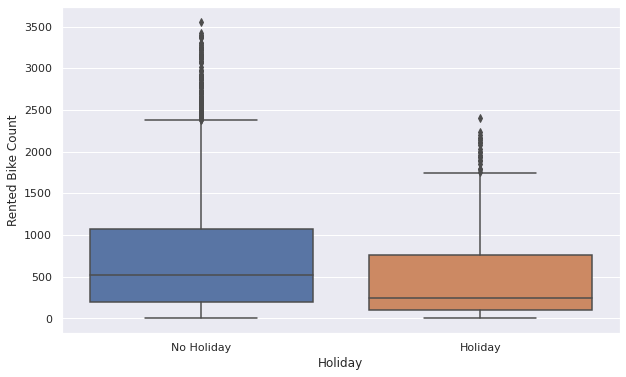

In [16]:
sns.boxplot(x='Holiday', y = 'Rented Bike Count', data = df);

The distribution of rented bikes is more spread out outside holidays. This can mean that bikes are used for communting to work, which makes sense.

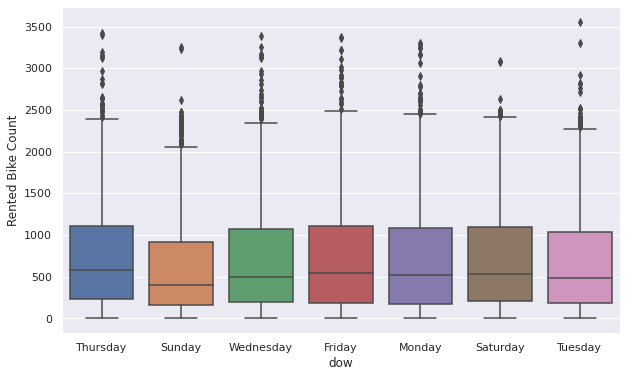

In [17]:
sns.boxplot(x='dow', y = 'Rented Bike Count', data = df);

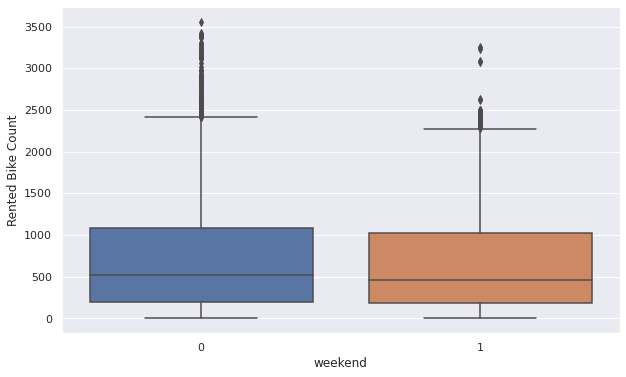

In [18]:
sns.boxplot(x='weekend', y = 'Rented Bike Count', data = df);

## End of article figures

Next, we can do simple line plots to see the evolution of the number of rented bikes along the observed period as well as weather conditions, hourly.

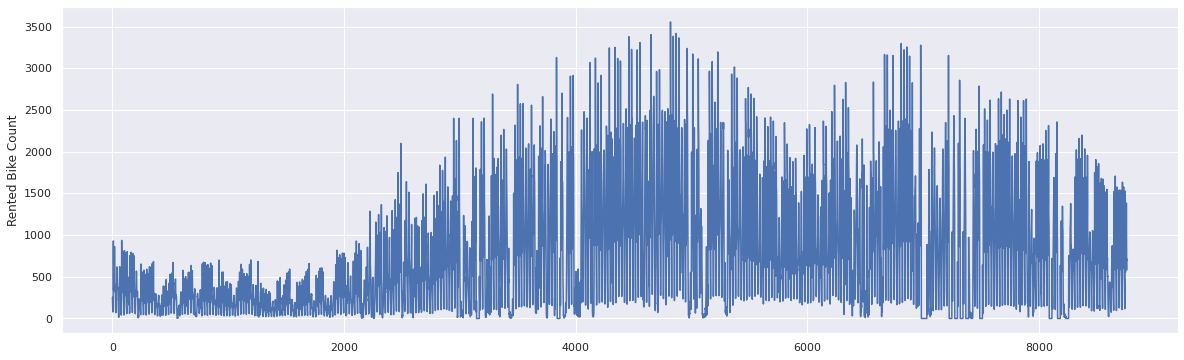

In [19]:
plt.figure(figsize=(20,6))
sns.lineplot(x = df.index, y = 'Rented Bike Count', data = df);

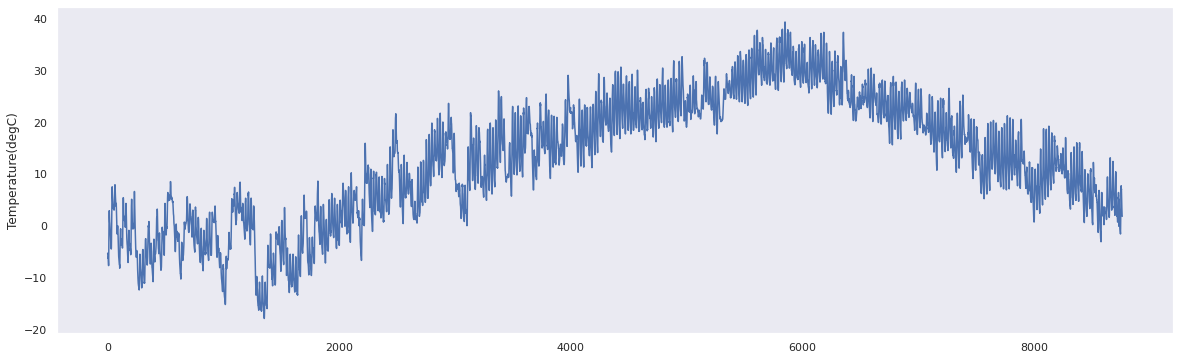

In [20]:
plt.figure(figsize=(20,6))
plt.grid()
sns.lineplot(x = df.index, y = 'Temperature(degC)', data = df);

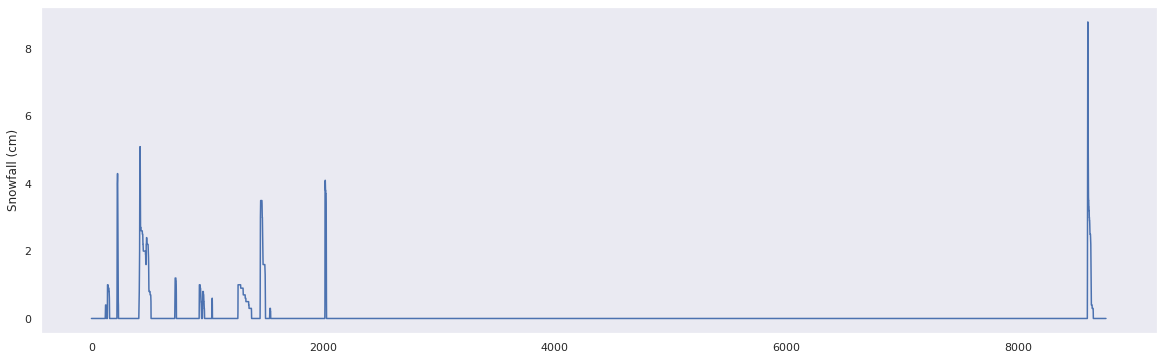

In [21]:
plt.figure(figsize=(20,6))
plt.grid()
sns.lineplot(x = df.index, y = 'Snowfall (cm)', data = df);

<AxesSubplot:ylabel='Rainfall(mm)'>

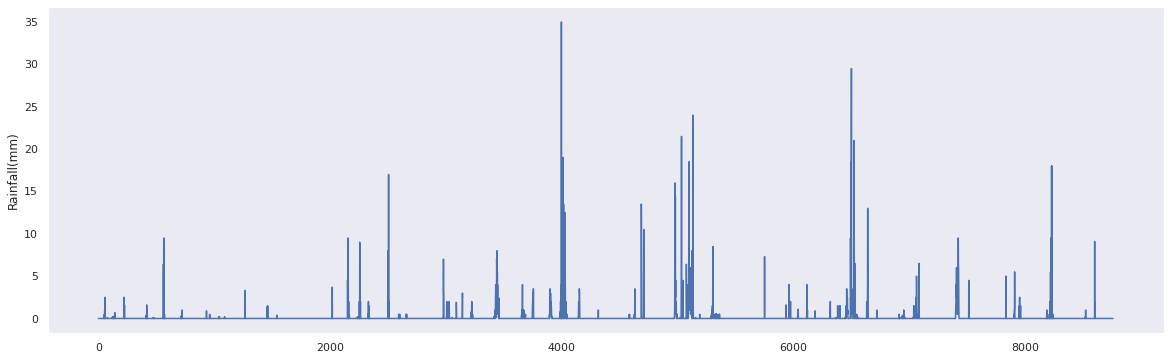

In [22]:
plt.figure(figsize=(20,6))
plt.grid()
sns.lineplot(x = df.index, y = 'Rainfall(mm)', data = df)

<AxesSubplot:ylabel='Visibility (10m)'>

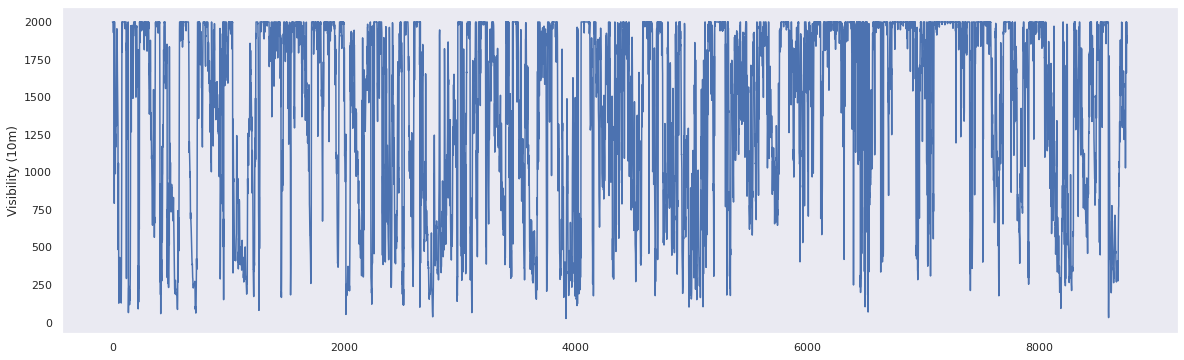

In [23]:
plt.figure(figsize=(20,6))
plt.grid()
sns.lineplot(x = df.index, y = 'Visibility (10m)', data = df)

<AxesSubplot:ylabel='Wind speed (m/s)'>

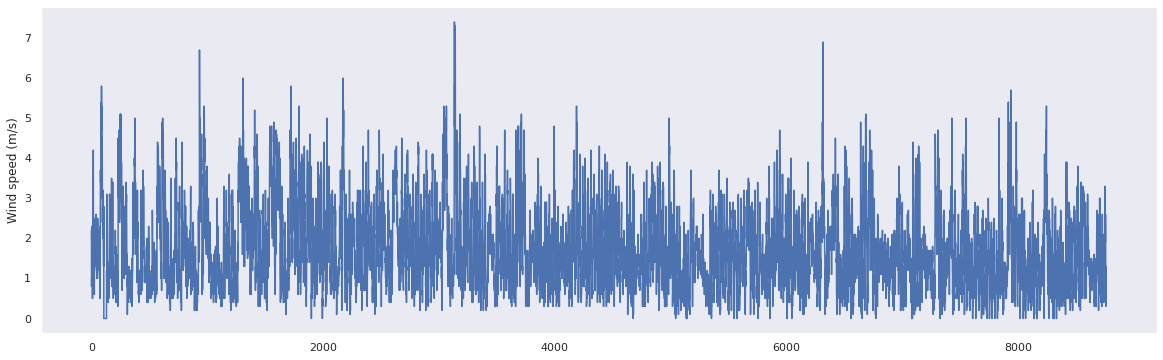

In [24]:
plt.figure(figsize=(20,6))
plt.grid()
sns.lineplot(x = df.index, y = 'Wind speed (m/s)', data = df)

To get a better feel for the temperature range in Seoul, we can do a histogram of the temperature along the observed period.

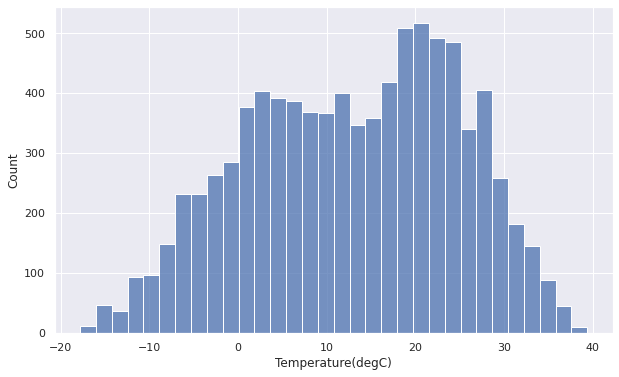

In [25]:
sns.histplot(data = df, x='Temperature(degC)');

We can do the same with humidity, for example.

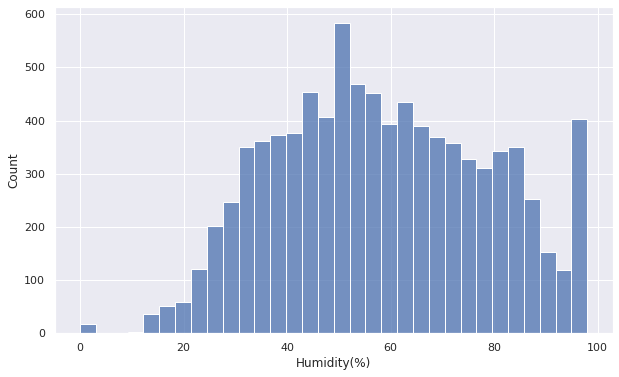

In [26]:
sns.histplot(data = df, x='Humidity(%)');

To start getting a sense as to how weather affects the rented bikes, we can build a scatter plot of rented bikes vs. temperature to see if there is any correlations between high temperatues and high bike demand.

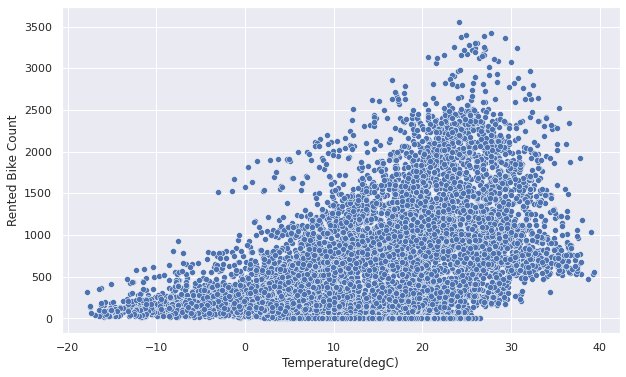

In [27]:
sns.scatterplot(x = 'Temperature(degC)', y ='Rented Bike Count', data=df);

There really seems to be a tendency for people in Seoul to rent more bikes in hotter days. Let's inspect this visual correlation between all features by doing a pairplot on the whole dataframe.
We'll choose only relevant features and exclude the categorical ones that have numeric represntation (like weekend and Functioning Day).

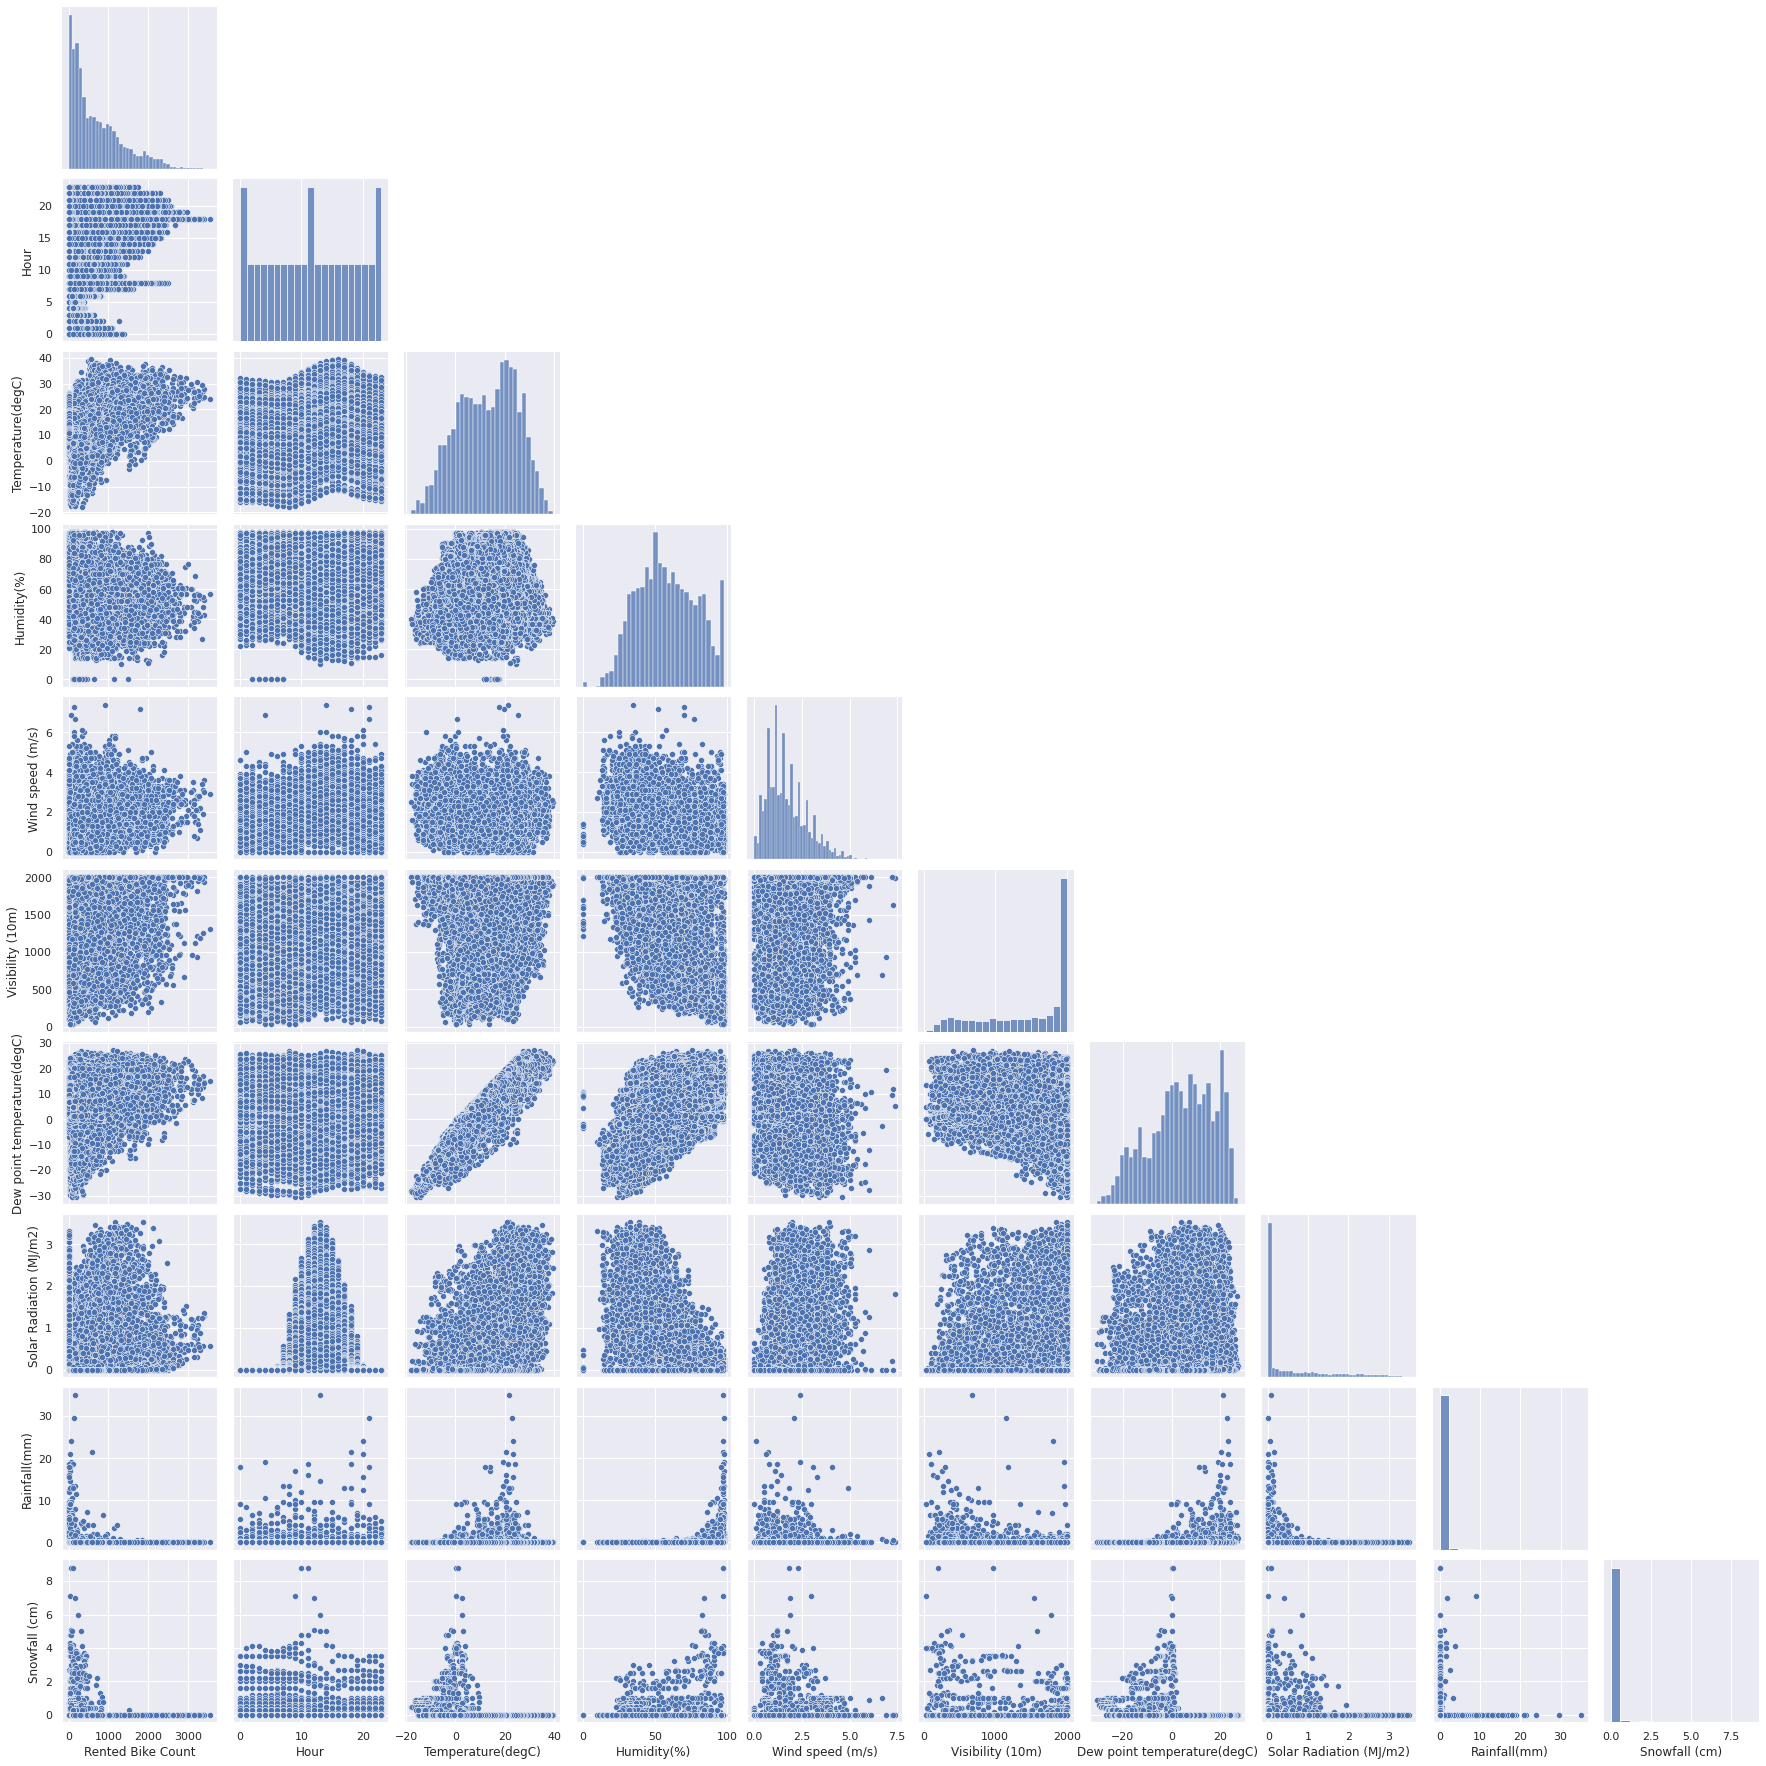

In [31]:
sns.pairplot(df[['Rented Bike Count', 'Hour', 'Temperature(degC)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(degC)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       ]], corner=True);

## A little exploration on the different seasons

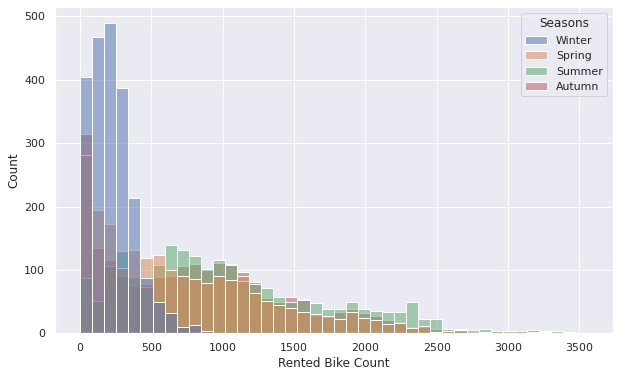

In [32]:
sns.histplot(data = df, x = 'Rented Bike Count', hue='Seasons');

In [33]:
# EDA by season
season = df.groupby('Seasons')[['Rented Bike Count','Temperature(degC)', 'Humidity(%)']].agg(['min', 'max', 'mean'])

Going beyond the graph, let's explore some numerics for the temperature and humidity across seasons.

In [36]:
season

Rented Bike Count                    Temperature(degC)        \
                      min   max         mean               min   max   
Seasons                                                                
Autumn                  0  3298   819.597985              -3.0  30.5   
Spring                  0  3251   730.031250              -6.6  29.4   
Summer                  9  3556  1034.073370              16.3  39.4   
Winter                  3   937   225.541204             -17.8  10.3   

                   Humidity(%)                 
              mean         min max       mean  
Seasons                                        
Autumn   14.120833          13  97  59.228480  
Spring   13.046694           0  98  58.776721  
Summer   26.582790          21  98  64.981431  
Winter   -2.540463          14  97  49.744907

To get a single index from the df above we can explicitly call for that column:

In [37]:
season['Rented Bike Count'].reset_index()

,Seasons,min,max,mean
0,Autumn,0,3298,819.597985
1,Spring,0,3251,730.031250
2,Summer,9,3556,1034.073370
3,Winter,3,937,225.541204


Finally, let's just check a box plot for the tempratures across seasons.

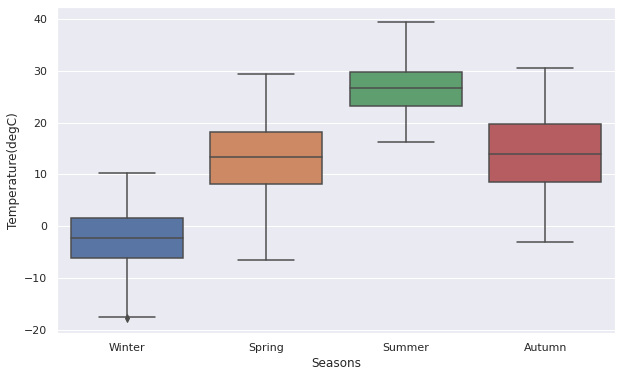

In [38]:
sns.boxplot(x='Seasons', y = 'Temperature(degC)', data = df);

# Preprocessing data

Now we can get our data to a format easily used in our predictive models. First we make a copy of `df` to keep it unchanged from here.

In [34]:
df_copy = df.copy()

In [35]:
df_copy.head()

,Date,Rented Bike Count,Hour,Temperature(degC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(degC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,dow,month,weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,January,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,January,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,January,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,January,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,1,Thursday,January,0


In [36]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         8760 non-null   datetime64[ns]
 1   Rented Bike Count            8760 non-null   int64         
 2   Hour                         8760 non-null   int64         
 3   Temperature(degC)            8760 non-null   float64       
 4   Humidity(%)                  8760 non-null   int64         
 5   Wind speed (m/s)             8760 non-null   float64       
 6   Visibility (10m)             8760 non-null   int64         
 7   Dew point temperature(degC)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)      8760 non-null   float64       
 9   Rainfall(mm)                 8760 non-null   float64       
 10  Snowfall (cm)                8760 non-null   float64       
 11  Seasons                      8760 non-null 

As we have transformed the `Date` column to obtain month and day of the week information, we can drop this column for our modelling.

In [37]:
df_copy = df_copy.drop('Date', axis = 1)

## Dealing with non-numeric features

Using panda's `select_dtypes()` function we can easily pick object features and store them in a separate df. In the same way, we can create a df with only numeric features:

In [38]:
df_nums = df_copy.select_dtypes(exclude='object')
df_objs = df_copy.select_dtypes(include='object')

Next, we use `get_dummies()` on the objects df to one-hot encode these features. Here we set `drop_first = True` to unnecessary ifnormation.

In [39]:
# Creating dummies
df_objs = pd.get_dummies(df_objs, drop_first = True)

In [40]:
df_final = pd.concat([df_nums, df_objs], axis = 1)

In [41]:
df_final.head()

,Rented Bike Count,Hour,Temperature(degC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(degC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [42]:
df_final.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(degC)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(degC)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Functioning Day', 'weekend', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'dow_Monday', 'dow_Saturday',
       'dow_Sunday', 'dow_Thursday', 'dow_Tuesday', 'dow_Wednesday',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September'],
      dtype='object')

# Features and their correlation

In [44]:
df_final.corr()

,Rented Bike Count,Hour,Temperature(degC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(degC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,...,-1.348852e-01,-1.392509e-01,-1.504572e-01,1.061004e-01,1.285077e-01,-4.392639e-02,8.997981e-02,-8.958464e-03,6.524433e-02,-5.147333e-03
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,...,-2.586291e-17,-6.535598e-19,-2.586291e-17,-2.586291e-17,3.333056e-19,-2.586291e-17,-2.586291e-17,3.199734e-19,-2.586291e-17,3.333056e-19
Temperature(degC),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,...,-2.560223e-01,-1.544153e-01,-2.591489e-01,2.612509e-01,1.532142e-01,-3.688838e-02,9.532769e-02,-1.276695e-01,-1.976742e-02,1.049498e-01
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,...,-4.059040e-02,-9.117630e-02,-7.922332e-02,3.530791e-02,1.089243e-01,2.398551e-02,3.762066e-02,-6.640068e-02,2.631837e-02,3.741851e-02
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,...,-1.886184e-02,3.156739e-02,2.590989e-02,-1.763684e-02,-8.757562e-03,5.554696e-02,1.014297e-02,-2.038926e-02,-1.965216e-02,-6.005735e-02
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,...,-2.118916e-02,7.096315e-03,-2.204479e-02,4.539412e-02,-1.182194e-01,-9.762469e-02,-4.422262e-02,-2.223304e-02,4.024887e-02,1.202214e-01
Dew point temperature(degC),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,...,-2.340547e-01,-1.744969e-01,-2.489764e-01,2.431622e-01,1.754366e-01,-2.261047e-02,9.846295e-02,-1.366760e-01,-5.923445e-03,1.077119e-01
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,...,-7.850674e-02,-1.934225e-02,-7.502799e-02,7.302146e-02,3.743415e-02,9.220857e-03,4.201441e-02,-4.487858e-02,-9.657711e-03,-3.860969e-03
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,...,-1.699566e-02,2.593837e-04,-7.376835e-03,-3.608812e-02,5.590647e-02,-1.470892e-02,3.824906e-02,-3.222039e-02,-1.822977e-02,-1.641503e-02
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,...,1.581300e-01,-5.643625e-03,1.222188e-01,-4.261607e-02,-4.325425e-02,-5.030462e-02,-5.236740e-02,6.562057e-02,-1.233070e-02,-4.116050e-02


<AxesSubplot:>

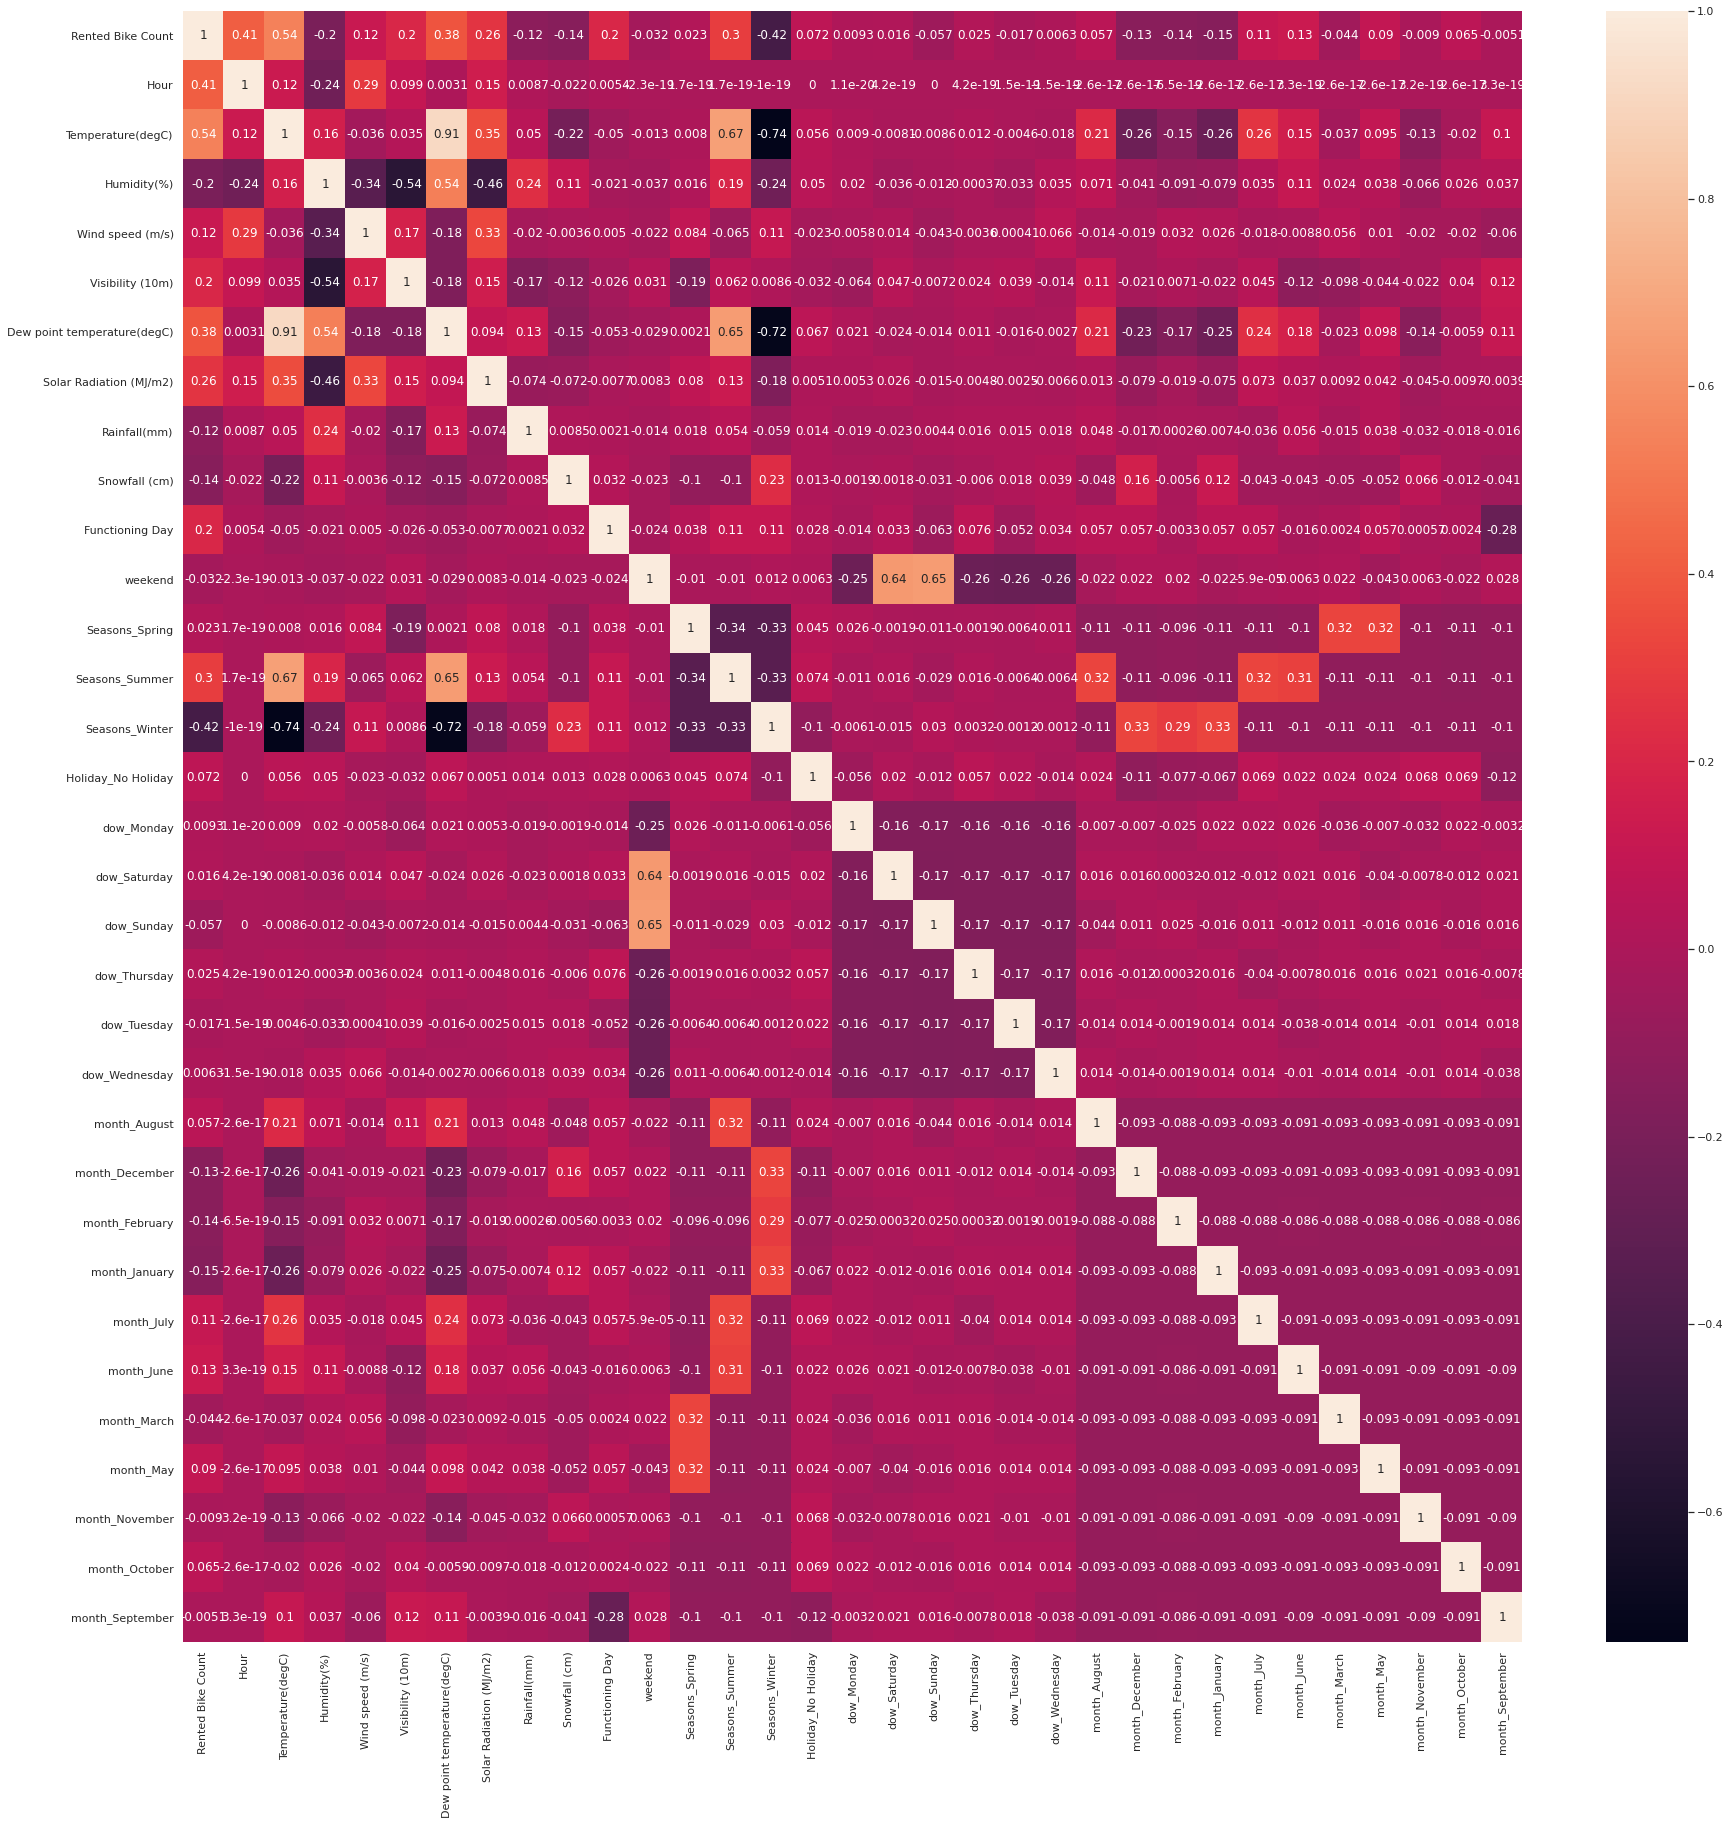

In [45]:
plt.figure(figsize=(30,30))
sns.heatmap(df_final.corr(), annot=True);

We can get a visual on how features correlate with our target variable (`Rented Bike Count`).

First, we select the `Rented Bike Count` column from the df **df_final.corr()**.

In [46]:
corr_feats = df_final.corr()['Rented Bike Count']

We can sort this in ascending order.

In [47]:
corr_feats = corr_feats.sort_values(ascending=True)

In [48]:
corr_feats

Seasons_Winter                -0.424925
Humidity(%)                   -0.199780
month_January                 -0.150457
Snowfall (cm)                 -0.141804
month_February                -0.139251
month_December                -0.134885
Rainfall(mm)                  -0.123074
dow_Sunday                    -0.057264
month_March                   -0.043926
weekend                       -0.032259
dow_Tuesday                   -0.016768
month_November                -0.008958
month_September               -0.005147
dow_Wednesday                  0.006339
dow_Monday                     0.009287
dow_Saturday                   0.016271
Seasons_Spring                 0.022888
dow_Thursday                   0.024774
month_August                   0.057119
month_October                  0.065244
Holiday_No Holiday             0.072338
month_May                      0.089980
month_July                     0.106100
Wind speed (m/s)               0.121108
month_June                     0.128508


Now, to use a simple bar plot to see which features correlate the most with the target variable.

<AxesSubplot:>

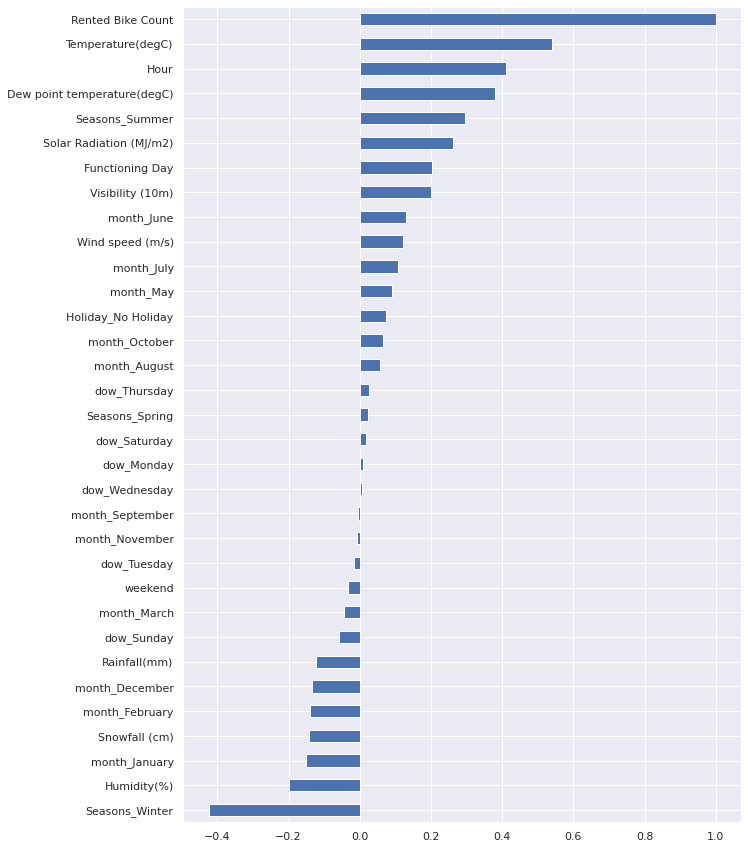

In [49]:
corr_feats.plot(kind='barh', figsize=(10,15));

Notice that `Temperature` highly correlates with the number of rented bikes in a positive way, while being on winter has the most negative correlation.

# Modeling

We'll first try a simple linear model (Elastic NET) with tunned hyperparameters to try to predict the number of rented bikes.

## [Elastic NET model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [50]:
# Features and target
X = df_final.drop('Rented Bike Count', axis = 1)
y = df_final['Rented Bike Count']

In [51]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [52]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [53]:
# Fitting and scaling on train set and transforming test set
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [54]:
# Creating base model
from sklearn.linear_model import ElasticNet

base_EN_model = ElasticNet()

In [55]:
# Creating dictionary for model parameters (used in grid search ahead)
param_grid = {'alpha': [0.1, 1, 5, 10, 50, 100],
              'l1_ratio': [.1, .5, .7, .9, .95, 1]}

In [56]:
# Setting up the gridsearchCV
from sklearn.model_selection import GridSearchCV

gscv_model = GridSearchCV(estimator = base_EN_model,
                          param_grid = param_grid,
                          scoring = 'r2',
                          cv = 5,
                          verbose = 2)

In [57]:
# Fitting
gscv_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.1s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.7 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.7, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.7 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.7, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.7 .........................................
[CV] .

[CV] ............................ alpha=5, l1_ratio=0.7, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.9 ...........................................
[CV] ............................ alpha=5, l1_ratio=0.9, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] ........................... alpha=5, l1_ratio=0.95, total=   0.0s
[CV] alpha=5, l1_ratio=0.95 ..........................................
[CV] .

[CV] .......................... alpha=50, l1_ratio=0.95, total=   0.0s
[CV] alpha=50, l1_ratio=0.95 .........................................
[CV] .......................... alpha=50, l1_ratio=0.95, total=   0.0s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.0s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.0s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.0s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.0s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.0s
[CV] alpha=100, l1_ratio=0.1 .........................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    3.7s finished


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 1]},
             scoring='r2', verbose=2)

In [58]:
# Best parameters
gscv_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.95}

In [59]:
# Make a prediction
y_pred = gscv_model.predict(scaled_X_test)

In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [61]:
mean_absolute_error(y_test, y_pred)

323.5582094166595

In [62]:
mean_squared_error(y_test, y_pred)

187308.46252701103

In [63]:
r2_score(y_test, y_pred)

0.5504376481179545

This model does not give a great result, which makes sense since it assumes some form of linear relation of the target with features. In this case, this is not a good assumption. So, let's try different models that deal better with this sort of non-linearity.

Before that, we can right a helper function to store metrics from each model:

In [64]:
def getMetrics(y_test, y_preds):
    print(50*'=')
    print('Mean Absolute error: ', mean_absolute_error(y_test, y_pred))
    print('Mean Squared error: ', mean_squared_error(y_test, y_pred))
    print('R2 score: ', r2_score(y_test, y_preds))
    print(50*'=')

## [KNN Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

In [65]:
from sklearn.neighbors import KNeighborsRegressor

In [66]:
# Base model
base_knn = KNeighborsRegressor(n_neighbors=5)

In [67]:
base_knn.fit(scaled_X_train, y_train)

KNeighborsRegressor()

In [68]:
y_pred = base_knn.predict(scaled_X_test)

In [69]:
base_knn.score(scaled_X_test, y_test)

0.7032945219939088

In [70]:
getMetrics(y_test, y_pred)

Mean Absolute error:  219.01700913242013
Mean Squared error:  123621.22111872144
R2 score:  0.7032945219939088


In [71]:
# cross-validation
from sklearn.model_selection import cross_val_score

In [72]:
scores = cross_val_score(base_knn,scaled_X_train,y_train,
                         scoring='r2',cv=10)

In [73]:
scores

array([0.71430547, 0.69777262, 0.6770367 , 0.76110572, 0.7280221 ,
       0.7265876 , 0.72396585, 0.7511029 , 0.70790447, 0.73882937])

In [74]:
abs(scores.mean())

0.7226632791338187

To include some more metrics in our cross validation, we can use `cross_validate` to get different metrics and scoring time:

In [75]:
from sklearn.model_selection import cross_validate

In [76]:
validate_scores = cross_validate(base_knn,scaled_X_train,y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error','r2'],cv=10)

`cross_validate` returns a dictionary with metrics on the cross validation scheme. Let's turn this to a pandas dataframe object for a better visual.

For each of the 10-fold cross validation we get our specified metrics ('neg_mean_absolute_error','neg_mean_squared_error','r2') and fitting and scoring times:

In [77]:
pd.DataFrame(validate_scores)

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_r2
0,0.083509,0.167605,-215.638231,-111481.864194,0.714305
1,0.066973,0.150539,-215.202853,-125996.752525,0.697773
2,0.069479,0.151561,-235.403138,-133030.091526,0.677037
3,0.068147,0.148022,-207.898146,-97544.563481,0.761106
4,0.068136,0.149207,-223.212839,-122332.274636,0.728022
5,0.071752,0.149567,-217.622254,-113973.064993,0.726588
6,0.070813,0.150434,-225.236805,-116501.739515,0.723966
7,0.066915,0.152428,-210.301569,-104939.599486,0.751103
8,0.069352,0.157831,-218.794571,-116933.512971,0.707904
9,0.068759,0.145524,-217.165143,-108648.298743,0.738829


To get the means of our metrcis across all 10-fods:

In [79]:
pd.DataFrame(validate_scores).mean()

fit_time                             0.070384
score_time                           0.152272
test_neg_mean_absolute_error      -218.647555
test_neg_mean_squared_error    -115138.176207
test_r2                              0.722663
dtype: float64

Now, to choose the best number of neighbors for our model we can loop through values from 1 to 20 and plot the R2 score for each model.

In [80]:
# create a loop to store r2 scores for different neighbors value
k_scores = []
for k in range(1,20):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, scaled_X_train, y_train, scoring='r2', cv=10)
    k_scores.append(abs(scores.mean()))

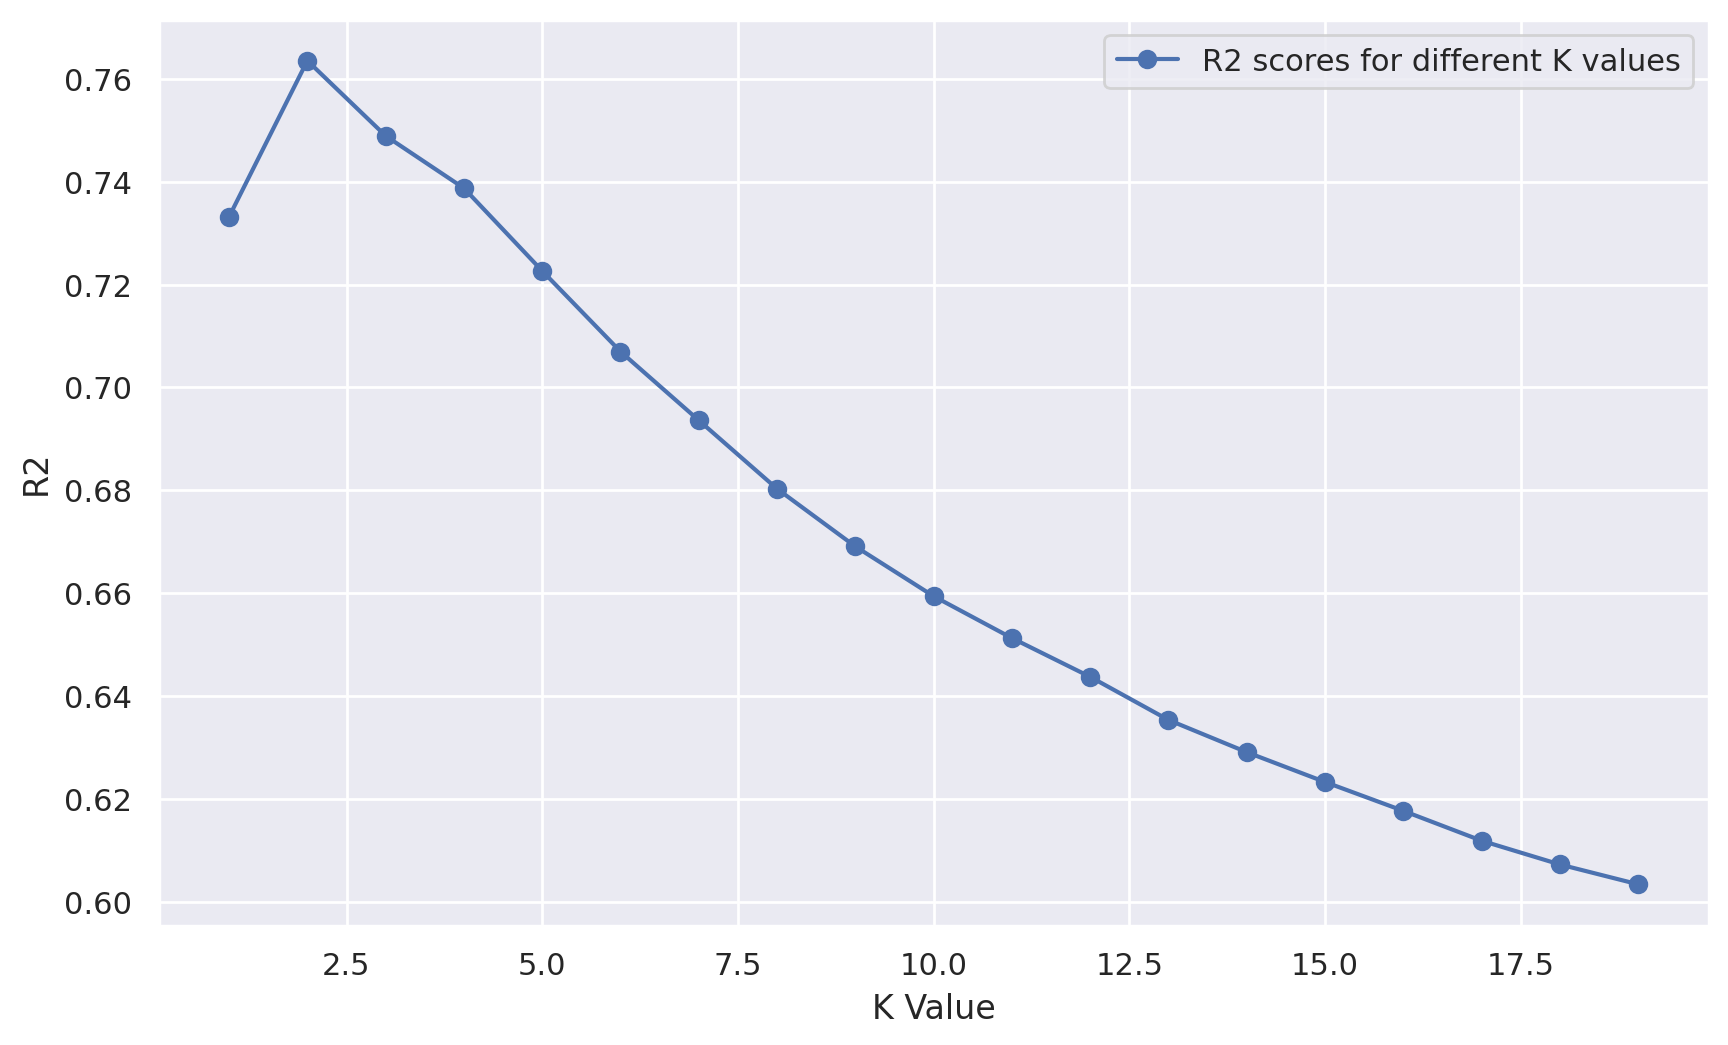

In [81]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,20),k_scores,
         marker="o",
         label='R2 scores for different K values')
plt.legend()
plt.ylabel('R2')
plt.xlabel("K Value");

Best performing model has **k = 2**. Let's print oout metrics for this model.

In [82]:
best_knn = KNeighborsRegressor(n_neighbors=2)
base_knn.fit(scaled_X_train, y_train)

# Cross validation
validate_scores = cross_validate(best_knn,scaled_X_train,y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error','r2'],cv=10)

pd.DataFrame(validate_scores).mean()

fit_time                            0.065847
score_time                          0.129909
test_neg_mean_absolute_error     -191.069071
test_neg_mean_squared_error    -98156.195977
test_r2                             0.763546
dtype: float64

# [RandomForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
# Base model
base_RF = RandomForestRegressor()

In [85]:
# Tree based models don't required scaling
base_RF.fit(X_train,y_train)

RandomForestRegressor()

In [86]:
y_pred = base_RF.predict(X_test)

In [88]:
getMetrics(y_test, y_pred)

Mean Absolute error:  124.75400684931508
Mean Squared error:  44491.25371541097
R2 score:  0.8932157555049249


In [89]:
# Cross validation
validate_scores = cross_validate(base_RF,X_train,y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error','r2'],cv=10)

pd.DataFrame(validate_scores).mean()

fit_time                            4.452085
score_time                          0.032298
test_neg_mean_absolute_error     -123.430055
test_neg_mean_squared_error    -42530.109986
test_r2                             0.897757
dtype: float64

## Hyperparamter tunning

In [90]:
# Hyperparamter tunning
param_grid = {
    'bootstrap': [True],
    'max_depth': [4,6,8,10,12,14,16,18,20, None],
    'n_estimators': [100, 200, 300]
}

base_RF = RandomForestRegressor()

In [91]:
gscv_RF = GridSearchCV(estimator = base_RF,
                       param_grid=param_grid,
                       scoring='r2',
                       cv = 10,
                       verbose = 2)

In [93]:
# Fitting
%timeit
gscv_RF.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] bootstrap=True, max_depth=4, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... bootstrap=True, max_depth=4, n_estimators=100, total=   1.2s
[CV] bootstrap=True, max_depth=4, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] .... bootstrap=True, max_depth=4, n_estimators=100, total=   1.2s
[CV] bootstrap=True, max_depth=4, n_estimators=100 ...................
[CV] .... bootstrap=True, max_depth=4, n_estimators=100, total=   1.2s
[CV] bootstrap=True, max_depth=4, n_estimators=100 ...................
[CV] .... bootstrap=True, max_depth=4, n_estimators=100, total=   1.3s
[CV] bootstrap=True, max_depth=4, n_estimators=100 ...................
[CV] .... bootstrap=True, max_depth=4, n_estimators=100, total=   1.3s
[CV] bootstrap=True, max_depth=4, n_estimators=100 ...................
[CV] .... bootstrap=True, max_depth=4, n_estimators=100, total=   1.3s
[CV] bootstrap=True, max_depth=4, n_estimators=100 ...................
[CV] .... bootstrap=True, max_depth=4, n_estimators=100, total=   1.2s
[CV] bootstrap=True, max_depth=4, n_estimators=100 ...................
[CV] .... bootstrap=True, max_depth=4, n_estimators=100, total=   1.2s
[CV] bootstrap=True, max_depth=4, n_estimators=100 ...................
[CV] .

[CV] .... bootstrap=True, max_depth=6, n_estimators=300, total=   3.2s
[CV] bootstrap=True, max_depth=8, n_estimators=100 ...................
[CV] .... bootstrap=True, max_depth=8, n_estimators=100, total=   1.4s
[CV] bootstrap=True, max_depth=8, n_estimators=100 ...................
[CV] .... bootstrap=True, max_depth=8, n_estimators=100, total=   1.4s
[CV] bootstrap=True, max_depth=8, n_estimators=100 ...................
[CV] .... bootstrap=True, max_depth=8, n_estimators=100, total=   1.4s
[CV] bootstrap=True, max_depth=8, n_estimators=100 ...................
[CV] .... bootstrap=True, max_depth=8, n_estimators=100, total=   1.4s
[CV] bootstrap=True, max_depth=8, n_estimators=100 ...................
[CV] .... bootstrap=True, max_depth=8, n_estimators=100, total=   1.4s
[CV] bootstrap=True, max_depth=8, n_estimators=100 ...................
[CV] .... bootstrap=True, max_depth=8, n_estimators=100, total=   1.4s
[CV] bootstrap=True, max_depth=8, n_estimators=100 ...................
[CV] .

[CV] ... bootstrap=True, max_depth=10, n_estimators=300, total=   5.8s
[CV] bootstrap=True, max_depth=10, n_estimators=300 ..................
[CV] ... bootstrap=True, max_depth=10, n_estimators=300, total=   5.5s
[CV] bootstrap=True, max_depth=10, n_estimators=300 ..................
[CV] ... bootstrap=True, max_depth=10, n_estimators=300, total=   5.2s
[CV] bootstrap=True, max_depth=12, n_estimators=100 ..................
[CV] ... bootstrap=True, max_depth=12, n_estimators=100, total=   2.1s
[CV] bootstrap=True, max_depth=12, n_estimators=100 ..................
[CV] ... bootstrap=True, max_depth=12, n_estimators=100, total=   2.1s
[CV] bootstrap=True, max_depth=12, n_estimators=100 ..................
[CV] ... bootstrap=True, max_depth=12, n_estimators=100, total=   2.1s
[CV] bootstrap=True, max_depth=12, n_estimators=100 ..................
[CV] ... bootstrap=True, max_depth=12, n_estimators=100, total=   2.1s
[CV] bootstrap=True, max_depth=12, n_estimators=100 ..................
[CV] .

[CV] ... bootstrap=True, max_depth=14, n_estimators=300, total=   7.2s
[CV] bootstrap=True, max_depth=14, n_estimators=300 ..................
[CV] ... bootstrap=True, max_depth=14, n_estimators=300, total=   6.8s
[CV] bootstrap=True, max_depth=14, n_estimators=300 ..................
[CV] ... bootstrap=True, max_depth=14, n_estimators=300, total=   6.7s
[CV] bootstrap=True, max_depth=14, n_estimators=300 ..................
[CV] ... bootstrap=True, max_depth=14, n_estimators=300, total=   6.9s
[CV] bootstrap=True, max_depth=14, n_estimators=300 ..................
[CV] ... bootstrap=True, max_depth=14, n_estimators=300, total=   7.1s
[CV] bootstrap=True, max_depth=16, n_estimators=100 ..................
[CV] ... bootstrap=True, max_depth=16, n_estimators=100, total=   2.7s
[CV] bootstrap=True, max_depth=16, n_estimators=100 ..................
[CV] ... bootstrap=True, max_depth=16, n_estimators=100, total=   2.5s
[CV] bootstrap=True, max_depth=16, n_estimators=100 ..................
[CV] .

[CV] ... bootstrap=True, max_depth=18, n_estimators=300, total=   8.7s
[CV] bootstrap=True, max_depth=18, n_estimators=300 ..................
[CV] ... bootstrap=True, max_depth=18, n_estimators=300, total=   9.2s
[CV] bootstrap=True, max_depth=18, n_estimators=300 ..................
[CV] ... bootstrap=True, max_depth=18, n_estimators=300, total=   8.2s
[CV] bootstrap=True, max_depth=18, n_estimators=300 ..................
[CV] ... bootstrap=True, max_depth=18, n_estimators=300, total=   7.8s
[CV] bootstrap=True, max_depth=18, n_estimators=300 ..................
[CV] ... bootstrap=True, max_depth=18, n_estimators=300, total=   7.7s
[CV] bootstrap=True, max_depth=18, n_estimators=300 ..................
[CV] ... bootstrap=True, max_depth=18, n_estimators=300, total=   7.7s
[CV] bootstrap=True, max_depth=18, n_estimators=300 ..................
[CV] ... bootstrap=True, max_depth=18, n_estimators=300, total=   8.1s
[CV] bootstrap=True, max_depth=20, n_estimators=100 ..................
[CV] .

[CV] . bootstrap=True, max_depth=None, n_estimators=300, total=   8.1s
[CV] bootstrap=True, max_depth=None, n_estimators=300 ................
[CV] . bootstrap=True, max_depth=None, n_estimators=300, total=   8.1s
[CV] bootstrap=True, max_depth=None, n_estimators=300 ................
[CV] . bootstrap=True, max_depth=None, n_estimators=300, total=   8.0s
[CV] bootstrap=True, max_depth=None, n_estimators=300 ................
[CV] . bootstrap=True, max_depth=None, n_estimators=300, total=   8.1s
[CV] bootstrap=True, max_depth=None, n_estimators=300 ................
[CV] . bootstrap=True, max_depth=None, n_estimators=300, total=   8.1s
[CV] bootstrap=True, max_depth=None, n_estimators=300 ................
[CV] . bootstrap=True, max_depth=None, n_estimators=300, total=   8.2s
[CV] bootstrap=True, max_depth=None, n_estimators=300 ................
[CV] . bootstrap=True, max_depth=None, n_estimators=300, total=   8.1s
[CV] bootstrap=True, max_depth=None, n_estimators=300 ................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 21.2min finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True],
                         'max_depth': [4, 6, 8, 10, 12, 14, 16, 18, 20, None],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [94]:
# Best parameters
gscv_RF.best_params_
# print("This gave: {'bootstrap': True, 'max_depth': None, 'n_estimators': 300}")

{'bootstrap': True, 'max_depth': 20, 'n_estimators': 300}

In [95]:
print("This gave: {'bootstrap': True, 'max_depth': 20, 'n_estimators': 300}")

This gave: {'bootstrap': True, 'max_depth': 20, 'n_estimators': 300}


In [96]:
gscv_RF.score(X_test,y_test)

0.8934057282143695

In [98]:
# Using best parameters
best_RF = RandomForestRegressor(max_depth = 20, n_estimators=300)

# Tree based models don't required scaling
best_RF.fit(X_train,y_train)

# Cross validation
validate_scores = cross_validate(best_RF,X_train,y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error','r2'],cv=10)

pd.DataFrame(validate_scores).mean()

fit_time                            8.311870
score_time                          0.059341
test_neg_mean_absolute_error     -122.933846
test_neg_mean_squared_error    -42181.555660
test_r2                             0.898570
dtype: float64

## Feature importance

We can get a visual for the feature importance of our RF model.

First we can get a list of the importance values (normalized) for all features:

In [101]:
importances = best_RF.feature_importances_

In [102]:
importances

array([0.28424204, 0.30530886, 0.06922416, 0.01256742, 0.01305044,
       0.02672785, 0.08840993, 0.03852397, 0.00037272, 0.08816817,
       0.01037086, 0.00831454, 0.00172491, 0.02125828, 0.00254952,
       0.00205094, 0.00299004, 0.00234614, 0.0015894 , 0.00124709,
       0.00210327, 0.00178771, 0.00070393, 0.00124388, 0.00095733,
       0.00118764, 0.0014606 , 0.00363842, 0.00138438, 0.00094933,
       0.00183788, 0.00170836])

Using `zip()` we can combine these importances with the feature columns to create a dictionary of importances as values and the feature names as keys:

In [103]:
importances_dict = dict(zip(X.columns, importances))
print(importances_dict)

{'Hour': 0.28424204084248655, 'Temperature(degC)': 0.30530886296466403, 'Humidity(%)': 0.06922416314889403, 'Wind speed (m/s)': 0.012567423671106416, 'Visibility (10m)': 0.013050443166779554, 'Dew point temperature(degC)': 0.026727853259584274, 'Solar Radiation (MJ/m2)': 0.08840993341816566, 'Rainfall(mm)': 0.038523974315339826, 'Snowfall (cm)': 0.0003727207644053103, 'Functioning Day': 0.08816816631180412, 'weekend': 0.010370859368936874, 'Seasons_Spring': 0.008314540623715215, 'Seasons_Summer': 0.0017249094355607792, 'Seasons_Winter': 0.021258275994228255, 'Holiday_No Holiday': 0.0025495171659381905, 'dow_Monday': 0.0020509412873940445, 'dow_Saturday': 0.002990035046976264, 'dow_Sunday': 0.0023461359262025566, 'dow_Thursday': 0.0015893977138680842, 'dow_Tuesday': 0.001247088643740733, 'dow_Wednesday': 0.002103266056550833, 'month_August': 0.0017877079762174954, 'month_December': 0.0007039331125710821, 'month_February': 0.0012438752006975417, 'month_January': 0.0009573295245116191, 'm

In [104]:
# Order dictionary by value
importances_dict = {k: v for k, v in sorted(importances_dict.items(), key=lambda item: item[1])}

Text(0.5, 1.0, 'Feature importance for RandomForest model')

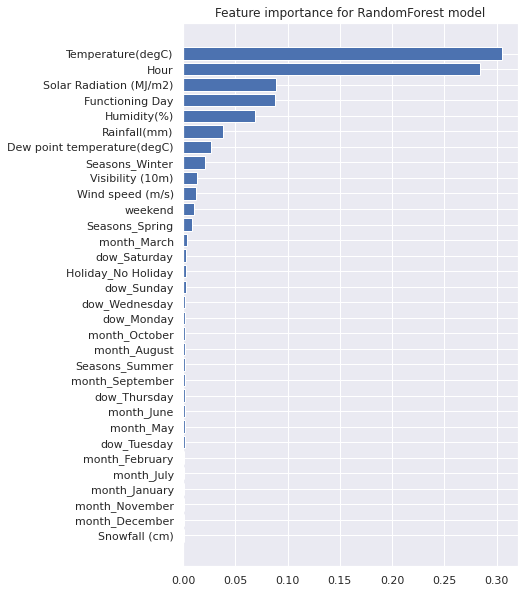

In [105]:
plt.figure(figsize=(6,10))
plt.barh(list(importances_dict.keys()), list(importances_dict.values()) )
plt.title("Feature importance for RandomForest model")

# [Using XGBoost](https://xgboost.readthedocs.io/en/latest/python/python_api.html)

In [106]:
from xgboost import XGBRegressor

In [107]:
base_xgb = XGBRegressor()

# Tree based models don't required scaling
base_xgb.fit(X_train,y_train)

base_xgb.score(X_test,y_test)

0.8964729756433382

In [108]:
# Cross validation
validate_scores = cross_validate(base_xgb,X_train,y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error','r2'],cv=10)

pd.DataFrame(validate_scores).mean()

fit_time                            0.222177
score_time                          0.003894
test_neg_mean_absolute_error     -119.195820
test_neg_mean_squared_error    -36658.076415
test_r2                             0.911828
dtype: float64

## Hyperparameter tunning

In [109]:
param_grid = {'learning_rate': [.03, 0.05, .07],
              'early_stopping_rounds': [5],
              'n_estimators': [500]}

In [110]:
gscv_xgb = GridSearchCV(estimator = base_xgb,
                          param_grid = param_grid,
                          scoring = 'r2',
                          cv = 10,
                          verbose = 2)

In [111]:
%timeit
gscv_xgb.fit(X_train, y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] early_stopping_rounds=5, learning_rate=0.03, n_estimators=500 ...
[22:19:42] WARNING: ../src/learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  early_stopping_rounds=5, learning_rate=0.03, n_estimators=500, total=   1.1s
[CV] early_stopping_rounds=5, learning_rate=0.03, n_estimators=500 ...
[22:19:43] WARNING: ../src/learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  early_stopping_rounds=5, learning_rate=0.03, n_estimators=500, total=   1.2s
[CV] early_stopping_rounds=5, learning_rate=0.03, n_estimators=500 ...
[22:19:45] WARNING: ../src/learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  early_stopping_rounds=5, learning_rate=0.03, n_estimators=500, total=   1.1s
[CV] early_stopping_rounds=5, learning_rate=0.03, n_estimators=500 ...
[22:19:46] WARNING: ../src/learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  earl

[CV]  early_stopping_rounds=5, learning_rate=0.05, n_estimators=500, total=   2.1s
[CV] early_stopping_rounds=5, learning_rate=0.05, n_estimators=500 ...
[22:20:13] WARNING: ../src/learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  early_stopping_rounds=5, learning_rate=0.05, n_estimators=500, total=   2.6s
[CV] early_stopping_rounds=5, learning_rate=0.07, n_estimators=500 ...
[22:20:16] WARNING: ../src/learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[CV]  earl

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   57.3s finished


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=0,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
     

In [112]:
gscv_xgb.best_score_

0.9178027013993691

In [113]:
gscv_xgb.best_params_

{'early_stopping_rounds': 5, 'learning_rate': 0.07, 'n_estimators': 500}

In [114]:
gscv_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=5,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.07, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### Building best model

In [115]:
best_xgb = XGBRegressor(n_estimators = 500,
                        learning_rate = 0.07,
                        early_stopping_rounds = 5)

# Tree based models don't required scaling
best_xgb.fit(X_train,y_train)

best_xgb.score(X_test,y_test)

[22:21:17] WARNING: ../src/learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




0.912463072586395

In [116]:
# Cross validation
validate_scores = cross_validate(best_xgb,X_train,y_train,
                         scoring=['neg_mean_absolute_error','neg_mean_squared_error','r2'],cv=10)

pd.DataFrame(validate_scores).mean()

[22:21:59] WARNING: ../src/learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:22:00] WARNING: ../src/learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:22:02] WARNING: ../src/learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if y

fit_time                            1.505987
score_time                          0.008992
test_neg_mean_absolute_error     -112.665380
test_neg_mean_squared_error    -34204.563882
test_r2                             0.917803
dtype: float64